In [58]:
print("\u0905\u0928\u0940\u0936")

अनीश


In [35]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Data Collection

In [36]:

file_path = 'temperatures.csv'
data = pd.read_csv(file_path)
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,32.00,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [37]:

# Data Wrangling removing null values from dataset
print("\nNull Values:\n", data.isnull().sum())


Null Values:
 YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64


In [38]:

# Check data types
print("\nData Types:\n", data.dtypes)


Data Types:
 YEAR         int64
JAN        float64
FEB        float64
MAR        float64
APR        float64
MAY        float64
JUN        float64
JUL        float64
AUG        float64
SEP        float64
OCT        float64
NOV        float64
DEC        float64
ANNUAL     float64
JAN-FEB    float64
MAR-MAY    float64
JUN-SEP    float64
OCT-DEC    float64
dtype: object


In [39]:

#new copy of data
data_removed = data

# Show the cleaned data(ie data_removed)
print("\nData after removing null values:\n", data_removed.head())


Data after removing null values:
    YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47  29.97   
1  1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80  29.12   
2  1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85  29.04   
3  1904  22.50  24.73  28.21  32.02  32.64  32.07  32.00  30.09  30.04  29.20   
4  1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12  30.67   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  27.31  24.49   28.96    23.27    31.46    31.27    27.25  
1  26.31  24.04   29.22    25.75    31.76    31.09    26.49  
2  26.08  23.65   28.47    24.24    30.71    30.92    26.26  
3  26.36  23.63   28.49    23.62    30.95    30.66    26.40  
4  27.52  23.82   28.30    22.25    30.00    31.33    26.57  


In [40]:

#  extracting the temperature data for all months (January to December) from the data_removed DataFrame and storing it in a new variable called temperature_data.
temperature_data = data_removed.loc[:, 'JAN':'DEC']

In [41]:

# Standardize the data
#This code is standardizing the temperature data, by performing Principal Component Analysis (PCA) on it, and then adding the result back into the original DataFrame (data_removed).
scaler = StandardScaler()
temperature_data_scaled = scaler.fit_transform(temperature_data)

# To reduce the dimensionality of the data (from multiple months to one component) using Principal Component Analysis (PCA).
pca = PCA(n_components=1)
pca_result = pca.fit_transform(temperature_data_scaled)

# Add the PCA component to the DataFrame and replace JAN to DEC columns
data_removed['Output_Feature'] = pca_result[:, 0]
# data_removed = data_removed.drop(columns=temperature_data.columns)

In [42]:

#This line creates a new DataFrame data_for_corr by removing the monthly columns (JAN to DEC) from the original data_removed DataFrame.
data_for_corr = data_removed.drop(columns=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

# Calculate the correlation matrix between PCA component and other columns
#data_for_corr.drop(columns=['Output_Feature']) removes the 'Output_Feature' column temporarily so that you can calculate correlations between it and the remaining columns.
correlation_matrix = data_for_corr.drop(columns=['Output_Feature']).corrwith(data_removed['Output_Feature']).abs()

# Find the column with the highest and second highest correlation with the PCA component
input_feature_1 = correlation_matrix.idxmax()
correlation_matrix = correlation_matrix.drop(input_feature_1)  # Remove the highest correlated feature
input_feature_2 = correlation_matrix.idxmax()

# Prepare the data for modeling with the highest correlated input feature
X_single = data_removed[[input_feature_1]]
y = data_removed['Output_Feature']

# Testing VS Training

In [43]:

#best_model will store the model with the lowest test MSE.
best_model = None
min_mse_test = float('inf')# infinity
best_X_train = None
best_X_test = None
best_y_train = None
best_y_test = None
best_train_size = None
best_test_size = None
mse_test_values = []
mse_train_values = []

model = LinearRegression()

# Use np.arange to divide the dataset
#The loop iterates over different training sizes from 0.1 (10%) to 0.9 (90%) in steps of 0.1.
for train_size in np.arange(0.1, 0.9, 0.1):
    if train_size >= 0.9:
        train_size = 0.9
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_single, y, train_size=train_size, random_state=42)
    
    # Train the Linear Regression model
    model.fit(X_train, y_train)
    
    # Predict and calculate metrics for both train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test) 
    
    # Check if the current model has the minimum test MSE
    if mse_test < min_mse_test:
        min_mse_test = mse_test
        best_model = model
        best_X_train, best_X_test = X_train, X_test
        best_y_train, best_y_test = y_train, y_test
        
        best_train_size = train_size
        best_test_size = 1 - train_size


In [44]:

# Print the minimum MSE, best train size, and best test size
print(f"Minimum MSE: {min_mse_test}")
print(f"Best Train Size: {best_train_size}")
print(f"Best Test Size: {best_test_size}")

Minimum MSE: 0.6922099827541852
Best Train Size: 0.7000000000000001
Best Test Size: 0.29999999999999993


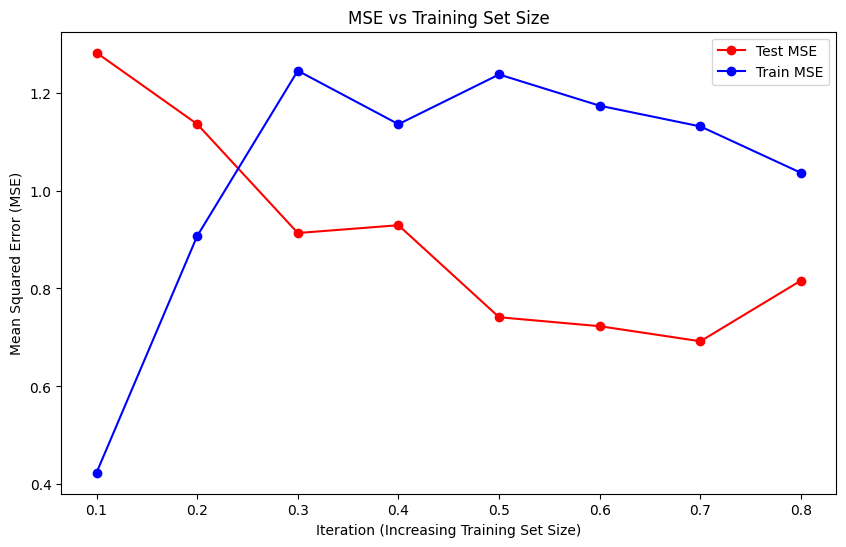

In [45]:

plt.figure(figsize=(10, 6))
plt.plot(np.arange(0.1, 0.9, 0.1), mse_test_values, marker='o', color='red', label='Test MSE')
plt.plot(np.arange(0.1, 0.9, 0.1), mse_train_values, marker='o', color='blue', label='Train MSE')
plt.xlabel('Iteration (Increasing Training Set Size)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Training Set Size')
plt.legend()
plt.show()


# LINEAR REGRESSION

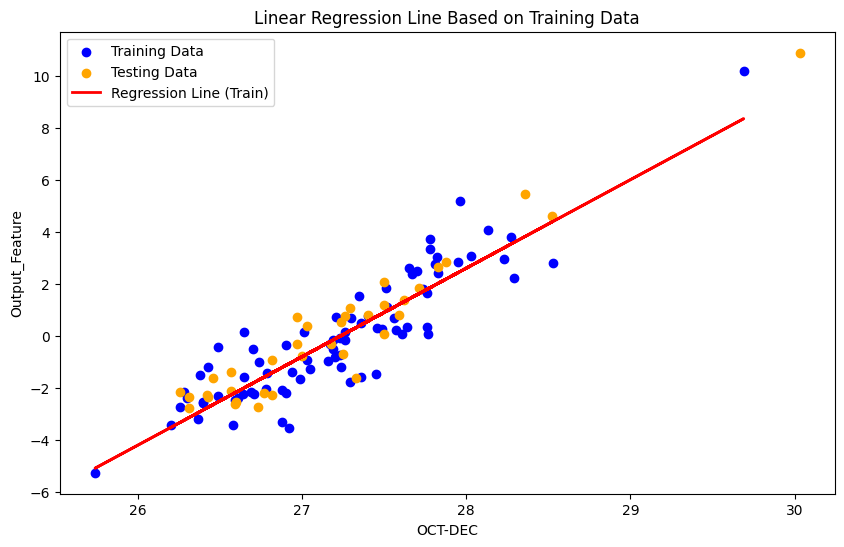

In [46]:
# Train the Linear Regression model on the training data only
model.fit(best_X_train, best_y_train)

# Predict the values using the training and test datasets separately
y_train_pred_full = model.predict(best_X_train)
y_test_pred_full = model.predict(best_X_test)

# Plot the actual vs predicted values based on the training and testing datasets
plt.figure(figsize=(10, 6))
plt.scatter(best_X_train, best_y_train, label="Training Data", color="blue")
plt.scatter(best_X_test, best_y_test, label="Testing Data", color="orange")
plt.plot(best_X_train, y_train_pred_full, label="Regression Line (Train)", color="red", linewidth=2)
plt.xlabel(input_feature_1)
plt.ylabel("Output_Feature")
plt.title("Linear Regression Line Based on Training Data")
plt.legend()
plt.show()

In [47]:
# Calculate Mean Squared Error (MSE) for training and testing data
train_mse = mean_squared_error(best_y_train, y_train_pred_full)
test_mse = mean_squared_error(best_y_test, y_test_pred_full)

# Print the MSE values
print(f"Training Error (MSE): {train_mse}")
print(f"Testing Error (MSE): {test_mse}")

Training Error (MSE): 1.1309601175007373
Testing Error (MSE): 0.6922099827541852


In [48]:

# Calculate R^2 for training and testing data
train_r2 = r2_score(best_y_train, y_train_pred_full)
test_r2 = r2_score(best_y_test, y_test_pred_full)

# Print the R^2 values
print(f"Training R^2: {train_r2}")
print(f"Testing R^2: {test_r2}")

Training R^2: 0.806348872403016
Testing R^2: 0.9086648101570386


In [49]:

# Calculate Mean Absolute Error (MAE) for training and testing data
train_mae = mean_absolute_error(best_y_train, y_train_pred_full)
test_mae = mean_absolute_error(best_y_test, y_test_pred_full)

# Print the MAE values
print(f"Training MAE: {train_mae}")
print(f"Testing MAE: {test_mae}")

Training MAE: 0.8386340919990726
Testing MAE: 0.6949199280380283


# 3D  MODELING

In [50]:
# Prepare the data for 3D modeling with two input features
X_double = data_removed[[input_feature_1, input_feature_2]]

# Split the data for 3D model
X_train_3d, X_test_3d, y_train_3d, y_test_3d = train_test_split(X_double, y, train_size=0.8, random_state=42)

# Train the Linear Regression model using training data only
model = LinearRegression()  # Initialize the model
model.fit(X_train_3d, y_train_3d)

# Create a meshgrid for 3D plotting using the range of training data
#A meshgrid is a tool used in numerical computing and data visualization to create a grid of coordinate values for 2D or 3D plotting.
x_surf, y_surf = np.meshgrid(
    np.linspace(X_train_3d[input_feature_1].min(), X_train_3d[input_feature_1].max(), 100),
    np.linspace(X_train_3d[input_feature_2].min(), X_train_3d[input_feature_2].max(), 100)
)

# Create a DataFrame for the meshgrid points
mesh_df = pd.DataFrame({
    input_feature_1: x_surf.ravel(),
    input_feature_2: y_surf.ravel()
})

# Predict using the DataFrame
z_surf = model.predict(mesh_df)
z_surf = z_surf.reshape(x_surf.shape)


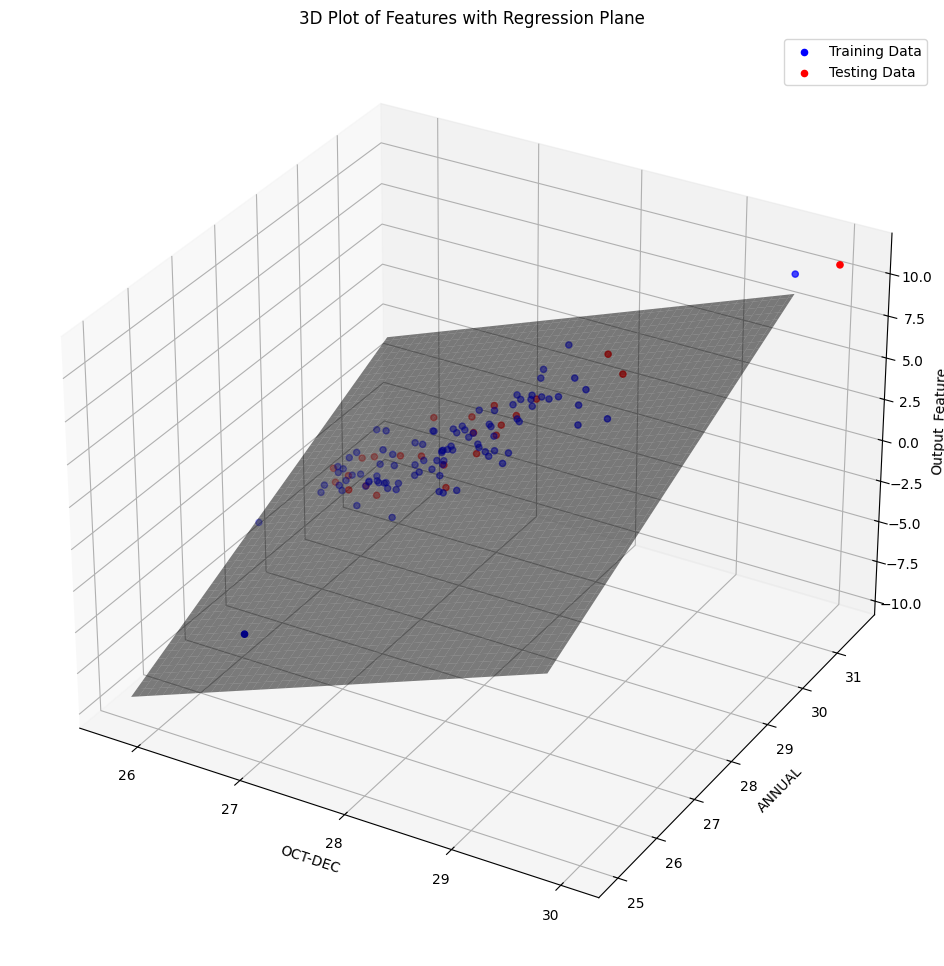

In [51]:
# 3D Plot of the Features with the regression plane
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot training data
ax.scatter(X_train_3d[input_feature_1], X_train_3d[input_feature_2], y_train_3d, color='blue', label='Training Data')
# Plot testing data
ax.scatter(X_test_3d[input_feature_1], X_test_3d[input_feature_2], y_test_3d, color='red', label='Testing Data')

# Plot the regression plane
#Plots the surface created by the linear regression model.
ax.plot_surface(x_surf, y_surf, z_surf, color='BLACK', alpha=0.5)

ax.set_xlabel(input_feature_1)
ax.set_ylabel(input_feature_2)
ax.set_zlabel('Output_Feature')
ax.set_title('3D Plot of Features with Regression Plane')
ax.legend()

plt.show()


In [52]:
# Predict using the model
y_train_pred_3d = model.predict(X_train_3d)
y_test_pred_3d = model.predict(X_test_3d)

# Calculate MSE
mse_train = mean_squared_error(y_train_3d, y_train_pred_3d)
mse_test = mean_squared_error(y_test_3d, y_test_pred_3d)

print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")

Training MSE: 0.5883819074678545
Testing MSE: 0.36540386940000597


In [53]:

# Calculate MAE
mae_train = mean_absolute_error(y_train_3d, y_train_pred_3d)
mae_test = mean_absolute_error(y_test_3d, y_test_pred_3d)

print(f"Training MAE: {mae_train}")
print(f"Testing MAE: {mae_test}")

Training MAE: 0.5780655925134489
Testing MAE: 0.4879678485773895


In [54]:

# Calculate R²
r2_train = r2_score(y_train_3d, y_train_pred_3d)
r2_test = r2_score(y_test_3d, y_test_pred_3d)

print(f"Training R²: {r2_train}")
print(f"Testing R²: {r2_test}")

Training R²: 0.8928476271883732
Testing R²: 0.961831959851154
